In [302]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [303]:
df = pd.read_csv("C:/Users/Kavita manoj/Downloads/Price_prediction.csv", na_values='?')

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized_losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel_type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel_base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb_weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine_size        205 non

In [305]:
df2 = df.drop(columns=['price', 'make', 'fuel_type', 'num-of-doors', 'engine-location', 'engine-type', 'fuel-system', 'aspiration', 'body-style', 'drive-wheels', 'num-of-cylinders'])

In [306]:
df2['normalized_losses'].fillna(df2['normalized_losses'].mean(), inplace=True)
df2['stroke'].fillna(df2['stroke'].mean(), inplace=True)
df2['bore'].fillna(df2['bore'].mean(), inplace=True)
df2['horsepower'].fillna(df2['horsepower'].mean(), inplace=True)
df2['peak_rpm'].fillna(df2['peak_rpm'].mean(), inplace=True)

X = add_constant(df2)
X

,const,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,1.0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
1,1.0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27
2,1.0,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26
3,1.0,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30
4,1.0,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,-1,95.0,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114.0,5400.0,23,28
201,1.0,-1,95.0,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160.0,5300.0,19,25
202,1.0,-1,95.0,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134.0,5500.0,18,23
203,1.0,-1,95.0,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106.0,4800.0,26,27


In [307]:
vif = pd.DataFrame()
vif["Feature"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [308]:
vif

,Feature,VIF
0,const,5046.363410
1,symboling,2.241758
2,normalized_losses,1.644779
3,wheel_base,8.900432
4,length,9.406163
5,width,5.758659
6,height,2.553167
7,curb_weight,16.590060
8,engine_size,6.708848
9,bore,2.156151


In [309]:
dfFinal = df2.drop(columns=['wheel_base', 'length', 'width', 'curb_weight', 'engine_size', 'horsepower', 'city_mpg', 'highway_mpg'])

In [310]:
dfFinal['price']= df['price']
dfFinal

,symboling,normalized_losses,height,bore,stroke,compression_ratio,peak_rpm,price
0,3,122.0,48.8,3.47,2.68,9.0,5000.0,13495.0
1,3,122.0,48.8,3.47,2.68,9.0,5000.0,16500.0
2,1,122.0,52.4,2.68,3.47,9.0,5000.0,16500.0
3,2,164.0,54.3,3.19,3.40,10.0,5500.0,13950.0
4,2,164.0,54.3,3.19,3.40,8.0,5500.0,17450.0
...,...,...,...,...,...,...,...,...
200,-1,95.0,55.5,3.78,3.15,9.5,5400.0,16845.0
201,-1,95.0,55.5,3.78,3.15,8.7,5300.0,19045.0
202,-1,95.0,55.5,3.58,2.87,8.8,5500.0,21485.0
203,-1,95.0,55.5,3.01,3.40,23.0,4800.0,22470.0


In [311]:
fit1 = smf.ols('price~bore**6', data=dfFinal).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     83.28
Date:                Fri, 17 Mar 2023   Prob (F-statistic):           8.05e-17
Time:                        13:57:18   Log-Likelihood:                -2054.7
No. Observations:                 201   AIC:                             4113.
Df Residuals:                     199   BIC:                             4120.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.042e+04   5895.868     -6.856      0.000   -5.21e+04   -2.88e+04
bore         1.61e+04   1764.486      9.126      0.000    1.26e+04    1.96e+04
==============================================================================
Omnibus:                       62.282   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.301
Skew:                           1.503   Prob(JB):                     6.18e-28
Kurtosis:                       5.435   Cond. No.                         45.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='height', ylabel='price'>

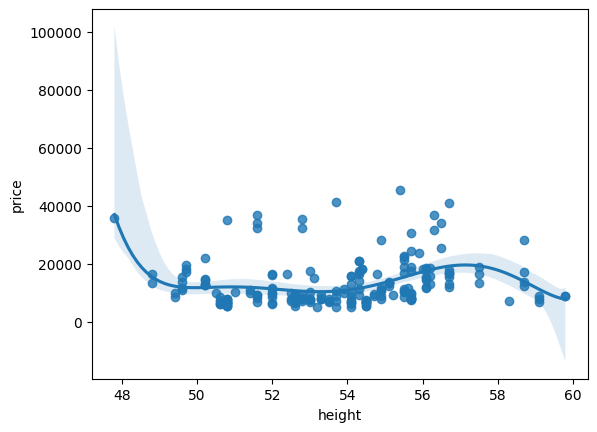

In [312]:
sns.regplot(data=dfFinal, x=dfFinal['height'], y=dfFinal['price'], order=6)